In [156]:
##Libraries

import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

In [157]:
sns.set()

In [158]:
data = datasets.load_iris()

In [159]:
df = pd.DataFrame(data["data"],columns=data["feature_names"])

In [160]:
df["targets"] = data["target"]
df["target_names"] = df["targets"].map({0:"setosa",1:"versicolor",2:"virginica"})

In [161]:
df_train,df_test = train_test_split(df,test_size=0.5)

In [162]:
#Set de Entrenamiento
X_train = df_train.drop(columns=["targets","target_names"]).values
y_train = df_train["targets"].values
#Set de Testing
X_test = df_test.drop(columns=["targets","target_names"]).values
y_test = df_test["targets"].values

In [163]:
y_test_arr = []
y_train_arr = []
for num in y_test:
    if num == 0:
        y_test_arr.append([1,0,0])
    if num == 1:
        y_test_arr.append([0,1,0])
    if num == 2:
        y_test_arr.append([0,0,1])
for num in y_train:
    if num == 0:
        y_train_arr.append([1,0,0])
    if num == 1:
        y_train_arr.append([0,1,0])
    if num == 2:
        y_train_arr.append([0,0,1])

In [164]:
class TrainingHistory:
    def __init__(self):
        self.epochs = []
        self.losses = []

    def add(self, epoch, loss):
        self.epochs.append(epoch)
        self.losses.append(loss)

    def plot(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.epochs, self.losses, label='Training Loss')
        plt.title('Training Loss over Epochs in Custom NN')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()


In [165]:
# %%
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights with small random values
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.01

        # Initialize the biases with small random values
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))
        self.history = TrainingHistory()
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        # Input to hidden
        self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        # Hidden to output
        self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        # Compute the output layer error
        output_error = y - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Compute the hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            if epoch % 1000 == 0:  # Reduce the frequency of logging
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss:{loss:.5f}")
                self.history.add(epoch, loss)

# %%


In [166]:

nn = NeuralNetwork(input_size=4, hidden_size=5, output_size=3)
nn.train(X_train, y_train_arr, epochs=20000, learning_rate=0.01)  # Adjust epochs and learning_rate

# Test the trained model
output = nn.feedforward(X_test)
print("Predictions after training:")
print(output)

# Convert the output to class labels
predicted_classes = np.argmax(output, axis=1)
true_classes = np.argmax(y_test_arr, axis=1)
diffclass = []
print("True classes:")
print(true_classes)
print("Predicted classes:")
print(predicted_classes)

# Evaluate the model's accuracy
net_accuracy = np.mean(predicted_classes == true_classes)
print(f"Accuracy: {net_accuracy * 100:.2f}%")


Epoch 0, Loss:0.25038
Epoch 1000, Loss:0.01757
Epoch 2000, Loss:0.00567
Epoch 3000, Loss:0.00324
Epoch 4000, Loss:0.00221
Epoch 5000, Loss:0.00165
Epoch 6000, Loss:0.00131
Epoch 7000, Loss:0.00107
Epoch 8000, Loss:0.00090
Epoch 9000, Loss:0.00078
Epoch 10000, Loss:0.00068
Epoch 11000, Loss:0.00060
Epoch 12000, Loss:0.00054
Epoch 13000, Loss:0.00049
Epoch 14000, Loss:0.00045
Epoch 15000, Loss:0.00041
Epoch 16000, Loss:0.00038
Epoch 17000, Loss:0.00035
Epoch 18000, Loss:0.00033
Epoch 19000, Loss:0.00031
Predictions after training:
[[2.47002780e-05 1.99654429e-03 9.98937054e-01]
 [1.98561775e-02 9.95007324e-01 2.43155577e-03]
 [2.26344874e-05 1.72491017e-03 9.99099029e-01]
 [5.22831245e-05 7.17272799e-03 9.95555059e-01]
 [9.82710390e-01 1.78562530e-02 1.39966956e-03]
 [9.82918223e-01 1.75859885e-02 1.40104510e-03]
 [1.86755799e-02 9.94390689e-01 2.76049289e-03]
 [2.03367581e-02 9.94226112e-01 2.62946600e-03]
 [7.82312539e-03 9.76113585e-01 1.43702261e-02]
 [2.23690215e-05 1.68990386e-03 9

In [167]:
# Calcular la matriz de confusión
conf_mat_nn = confusion_matrix(predicted_classes, true_classes)

# Crear un DataFrame para la visualización
conf_mat_df__nn = pd.DataFrame(conf_mat_nn, index=data['target_names'], columns=data['target_names'])

In [168]:
# Crear el modelo de Perceptrón Multicapa
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42)


In [169]:
# Entrenar el modelo
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

In [170]:
# Predecir los valores para el conjunto de prueba
y_pred = mlp.predict(X_test)


In [171]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 93.33%


In [172]:
# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=data["target_names"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        26
  versicolor       1.00      0.81      0.90        27
   virginica       0.81      1.00      0.90        22

    accuracy                           0.93        75
   macro avg       0.94      0.94      0.93        75
weighted avg       0.95      0.93      0.93        75



In [173]:
# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear un DataFrame para la visualización
conf_mat_df = pd.DataFrame(conf_mat, index=data['target_names'], columns=data['target_names'])


In [174]:
##Comparacion de resultados:

# Supongamos que tienes las siguientes predicciones y etiquetas verdaderas
y_test_true = true_classes  # Etiquetas verdaderas
y_pred_custom_nn = predicted_classes  # Predicciones de la NN personalizada
y_pred_sklearn_nn =  y_pred # Predicciones de la NN de sklearn

# Crear un DataFrame con las etiquetas y predicciones
df_results = pd.DataFrame({
    'True Labels': true_classes,
    'Custom NN Predictions': predicted_classes,
    'Sklearn NN Predictions': y_pred
})


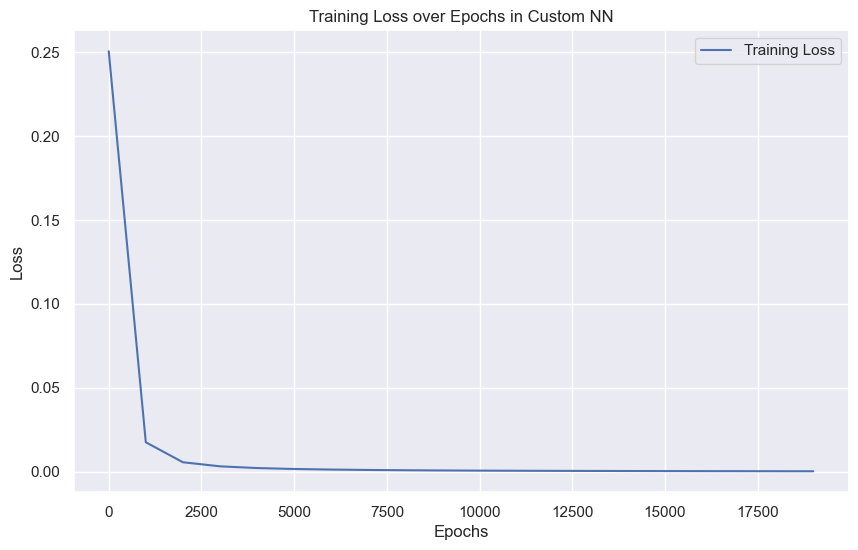

In [175]:
nn.history.plot()

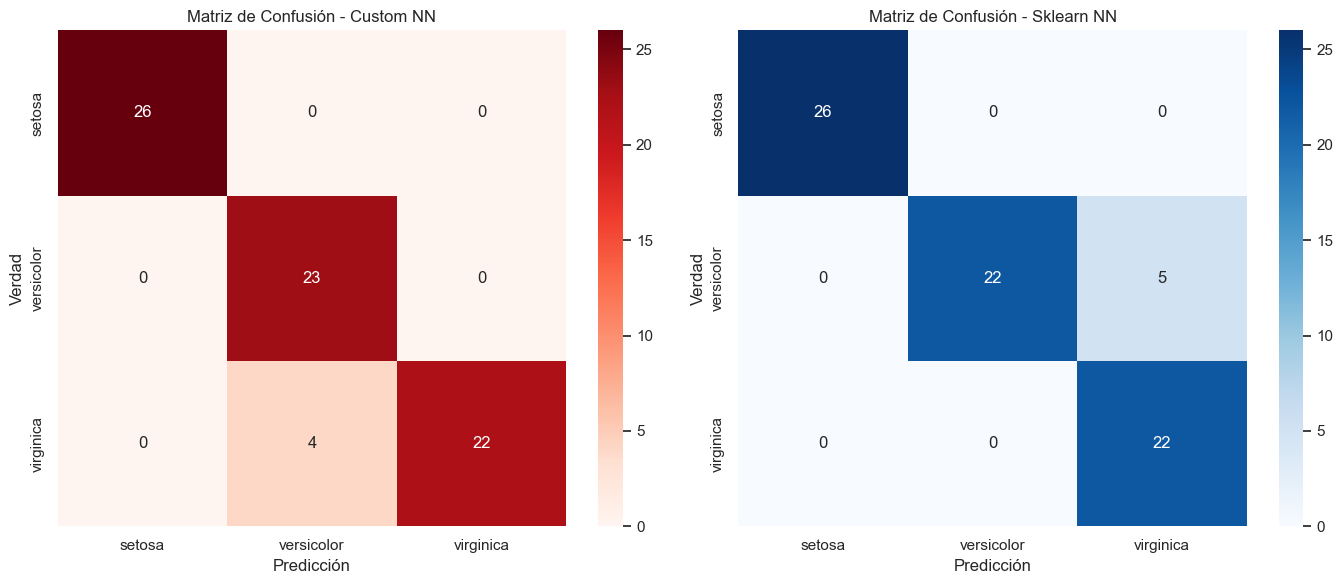

In [176]:
# Visualizar ambas matrices de confusión juntas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Matriz de confusión para la NN personalizada
sns.heatmap(conf_mat_df__nn, annot=True, cmap="Reds", ax=ax[0])
ax[0].set_title("Matriz de Confusión - Custom NN")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Verdad")

# Matriz de confusión para la NN de sklearn
sns.heatmap(conf_mat_df, annot=True, cmap="Blues", ax=ax[1])
ax[1].set_title("Matriz de Confusión - Sklearn NN")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Verdad")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30536\351256032.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


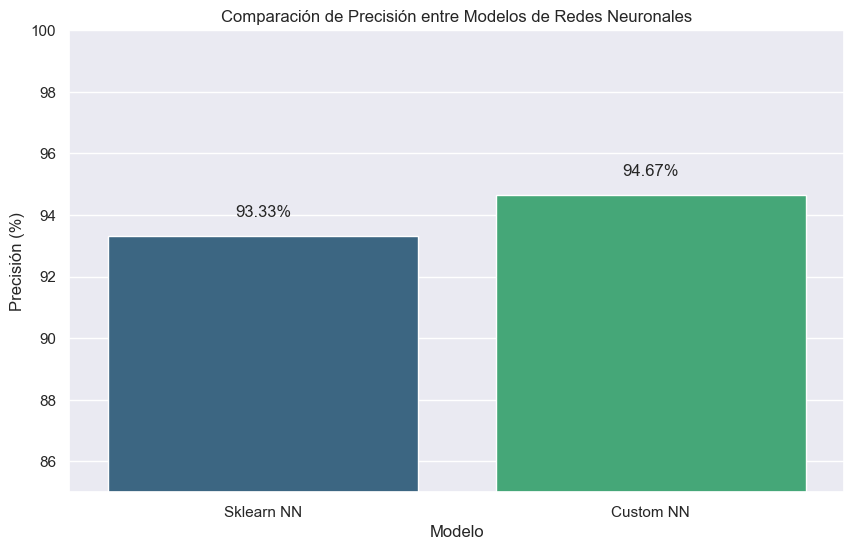

In [177]:
# Preparar los datos para el gráfico de barras
accuracies = [accuracy*100, net_accuracy*100]
model_names = ['Sklearn NN', 'Custom NN']

# Crear el gráfico de barras con mejoras
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')

# Agregar etiquetas de datos
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.5, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.title('Comparación de Precisión entre Modelos de Redes Neuronales')
plt.xlabel('Modelo')
plt.ylabel('Precisión (%)')
plt.ylim(85, 100)  # Ajustar el rango del eje y para resaltar diferencias
plt.show()
